In [1]:
import json
import os

import rootpath
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib
# matplotlib.use('Agg') # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd
import pycountry as pc
import pycountry_convert as pcc

from lhledge import cfgLoader
from lhledge import lhlFilters
from lhledge import superrouters
from lhledge import loadGeographicData

In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
# Change directory to run from the root dir of the project
path = rootpath.detect(pattern=".git")
os.chdir(path)

# load config file
cfg = cfgLoader.cfgLoader("config.yml")

In [6]:
f = open('data/external/caleb-segments/dist_v1_important.csv') 

In [7]:
nl, fl = [], [] 

In [8]:
countryDistance = {}

for line in f:
    id, near, far = line.strip().split(',') 
    _, nc, fc = id.split('_')
    near = float(near) if float(near) > 1 else 1
    far = float(far) if float(far) > 1 else 1
    
    nl.append(near)
    fl.append(far)

    if nc not in countryDistance:
        countryDistance[nc] = {'dist': [], 'mean': 0}
    if fc not in countryDistance:
        countryDistance[fc] = {'dist': [], 'mean': 0}
    countryDistance[nc]['dist'].append(near)
    countryDistance[fc]['dist'].append(far)

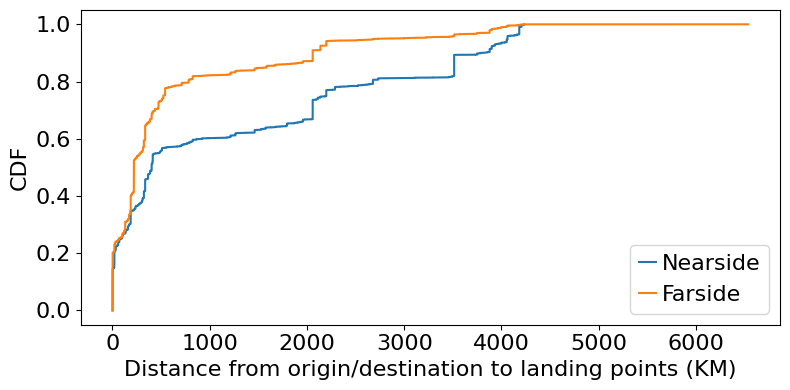

In [17]:
fig, ax = plt.subplots(1, figsize=(8, 4))

nl = np.sort(nl)

ax.plot(
    nl,
    np.linspace(0, 1, len(nl)),
    label='Nearside'
)

fl = np.sort(fl)

ax.plot(
    fl,
    np.linspace(0, 1, len(fl)),
    label='Farside'
)

ax.tick_params(labelsize=16)
ax.set_ylabel('CDF', fontsize=16)
# ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Distance from origin/destination to landing points (KM)', fontsize=16)

ax.legend(loc='lower right', ncol=1, frameon=True, fontsize=16,
          handletextpad=0.25, columnspacing=0.5, handlelength=0.75)

fig.subplots_adjust(hspace=0)
fig.tight_layout()

fig.savefig(f"figures/lhls/LHLdist.pdf")